# Capa binaria entrenable

In [1]:
import torch
import torch.nn as nn

class BinaryMaskLayer(nn.Module):
    def __init__(self, n_receptores=160, threshold=0.5):
        super().__init__()
        self.logits = nn.Parameter(torch.randn(n_receptores))  # inicialización aleatoria
        self.threshold = threshold

    def forward(self):
        probs = torch.sigmoid(self.logits)  # valores continuos en [0, 1]
        # Binarización con STE
        mask = (probs > self.threshold).float()
        # Straight-Through Estimator: gradientes pasan por `probs`
        mask = mask + (probs - probs.detach())
        return mask


In [2]:
layer = BinaryMaskLayer(n_receptores=160)
mask = layer()  # shape: (160,)
print(mask)
print("Porcentaje de receptores activos:", mask.mean().item() * 100, "%")

tensor([0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1.,
        1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
        0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
        1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
        0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
        0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
        1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
        1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0.,
        0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0.],
       grad_fn=<AddBackward0>)
Porcentaje de receptores activos: 55.62499761581421 %


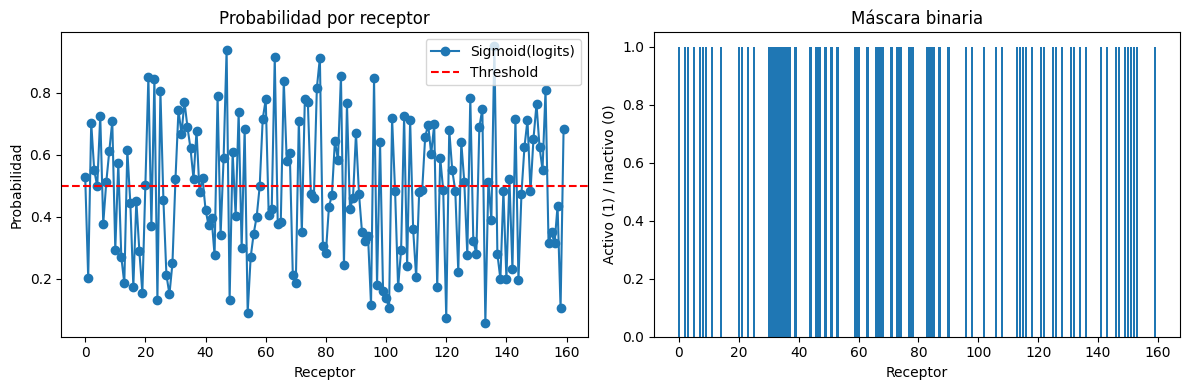

Receptores activos: 73/160 (45.62%)


In [ ]:
import torch
import matplotlib.pyplot as plt
from torch.nn.functional import sigmoid

layer = BinaryMaskLayer(n_receptores=160)

logits = layer.logits.detach().cpu().numpy()
probs = sigmoid(torch.tensor(logits)).numpy()
mask = layer().detach().cpu().numpy()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(probs, label="Sigmoid(logits)", marker='o')
plt.axhline(layer.threshold, color='red', linestyle='--', label="Threshold")
plt.title("Probabilidad por receptor")
plt.xlabel("Receptor")
plt.ylabel("Probabilidad")
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(range(len(mask)), mask)
plt.title("Máscara binaria")
plt.xlabel("Receptor")
plt.ylabel("Activo (1) / Inactivo (0)")


plt.tight_layout()
plt.show()

print(f"Receptores activos: {mask.sum():.0f}/{len(mask)} ({mask.mean()*100:.2f}%)")


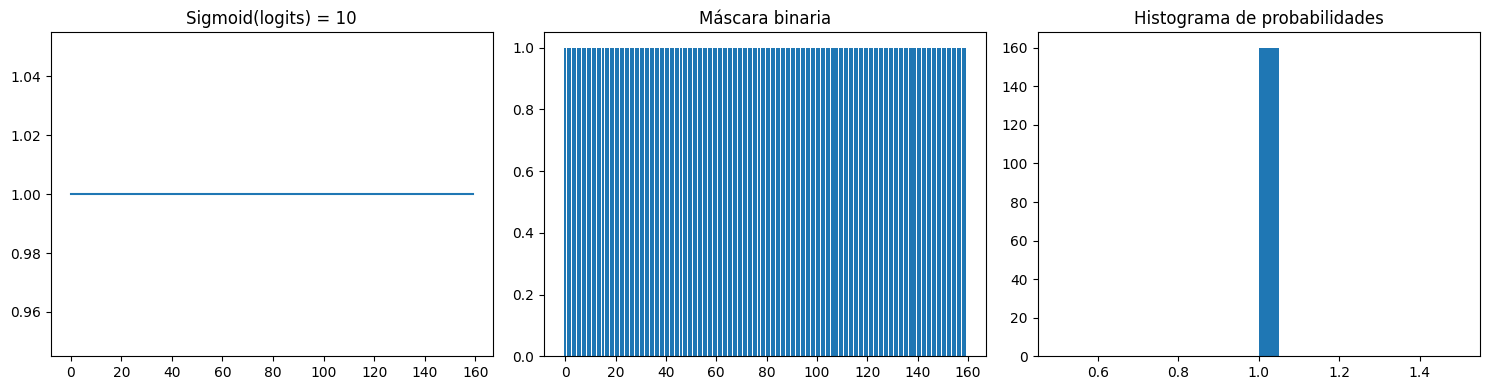

Activos: 160.0/160  →  100.00% activos


In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

class BinaryMaskLayer(nn.Module):
    def __init__(self, n_receptores=160, threshold=0.5):
        super().__init__()
        self.logits = nn.Parameter(torch.randn(n_receptores))
        self.threshold = threshold

    def forward(self):
        probs = torch.sigmoid(self.logits)
        mask = (probs > self.threshold).float()
        mask = mask + (probs - probs.detach())  # STE
        return probs, mask

layer = BinaryMaskLayer(n_receptores=160)
layer.logits.data = torch.full((160,), 10.0)  # Todos activos

probs, mask = layer()

fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].plot(probs.detach().numpy())
axs[0].set_title("Sigmoid(logits) = 10")

axs[1].bar(np.arange(160), mask.detach().numpy())
axs[1].set_title("Máscara binaria")

axs[2].hist(probs.detach().numpy(), bins=20)
axs[2].set_title("Histograma de probabilidades")

plt.tight_layout()
plt.show()

print(f"Activos: {mask.sum().item()}/{len(mask)}  →  {mask.mean().item()*100:.2f}% activos")


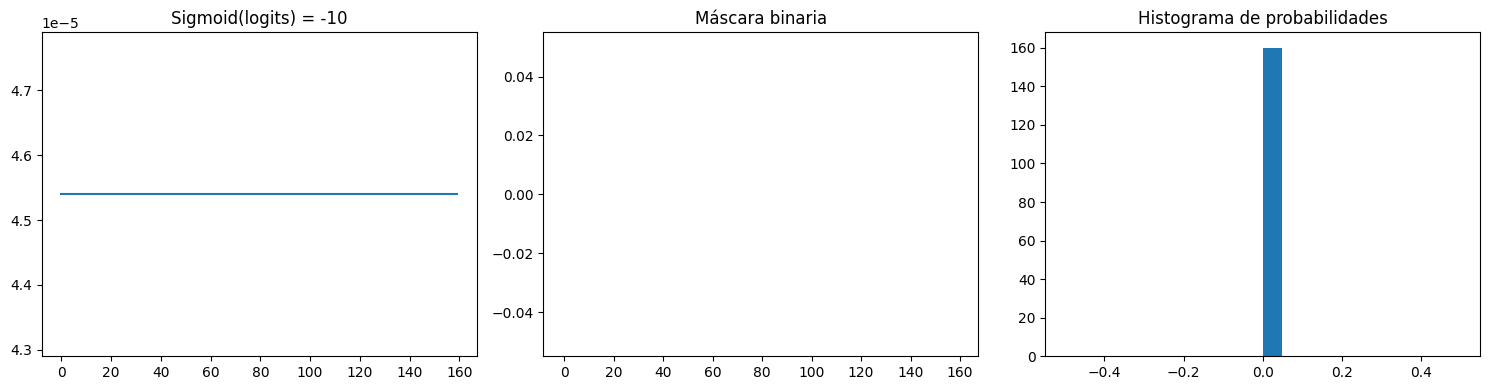

Activos: 0.0/160  →  0.00% activos


In [ ]:
layer = BinaryMaskLayer(n_receptores=160)
layer.logits.data = torch.full((160,), -10.0)  # Todos apagados

probs, mask = layer()

fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].plot(probs.detach().numpy())
axs[0].set_title("Sigmoid(logits) = -10")

axs[1].bar(np.arange(160), mask.detach().numpy())
axs[1].set_title("Máscara binaria")

axs[2].hist(probs.detach().numpy(), bins=20)
axs[2].set_title("Histograma de probabilidades")

plt.tight_layout()
plt.show()

print(f"Activos: {mask.sum().item()}/{len(mask)}  →  {mask.mean().item()*100:.2f}% activos")


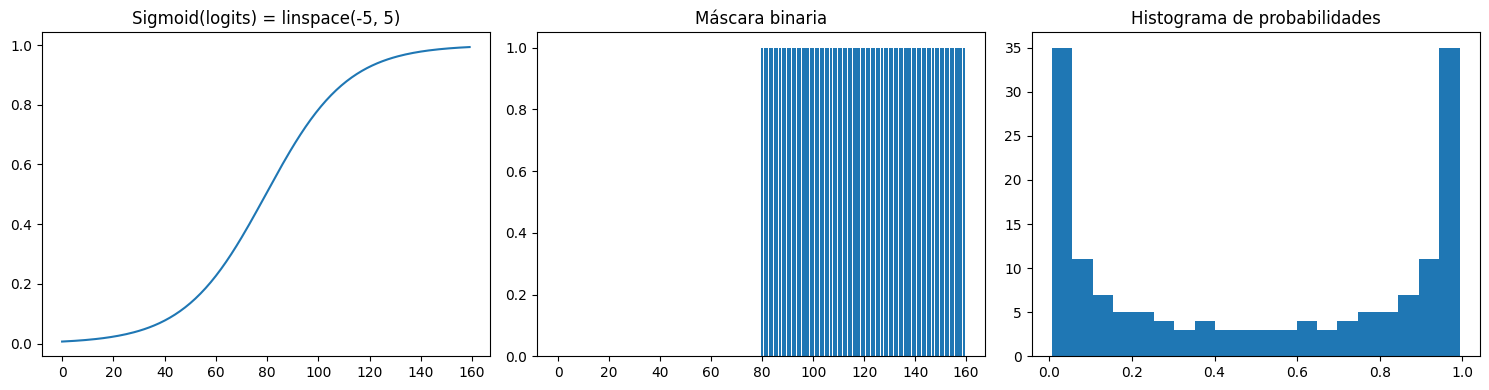

Activos: 80.0/160  →  50.00% activos


In [ ]:
layer = BinaryMaskLayer(n_receptores=160)
layer.logits.data = torch.linspace(-5, 5, 160)

probs, mask = layer()

fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].plot(probs.detach().numpy())
axs[0].set_title("Sigmoid(logits) = linspace(-5, 5)")

axs[1].bar(np.arange(160), mask.detach().numpy())
axs[1].set_title("Máscara binaria")

axs[2].hist(probs.detach().numpy(), bins=20)
axs[2].set_title("Histograma de probabilidades")

plt.tight_layout()
plt.show()
                                                                                                                                                                                                                                                                                                                                                                                  
print(f"Activos: {mask.sum().item()}/{len(mask)}  →  {mask.mean().item()*100:.2f}% activos")


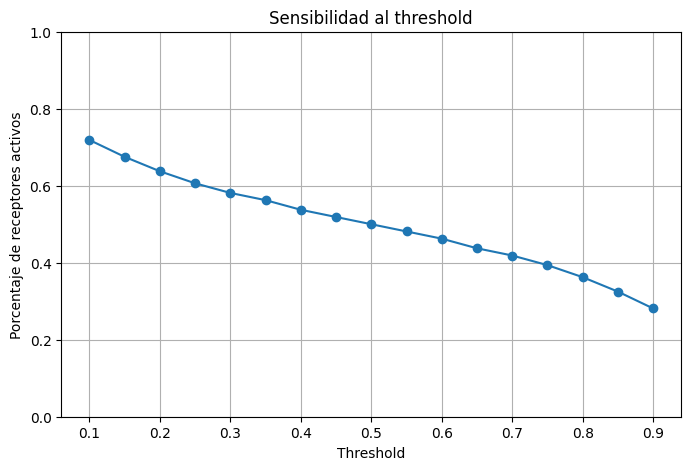

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

logits = torch.linspace(-5, 5, 160)
probs = torch.sigmoid(logits)

thresholds = np.linspace(0.1, 0.9, 17)
densities = [(probs > t).float().mean().item() for t in thresholds]

plt.figure(figsize=(8, 5))
plt.plot(thresholds, densities, marker='o')
plt.title("Sensibilidad al threshold")
plt.xlabel("Threshold")
plt.ylabel("Porcentaje de receptores activos")
plt.grid(True)
plt.ylim(0, 1)
plt.show()


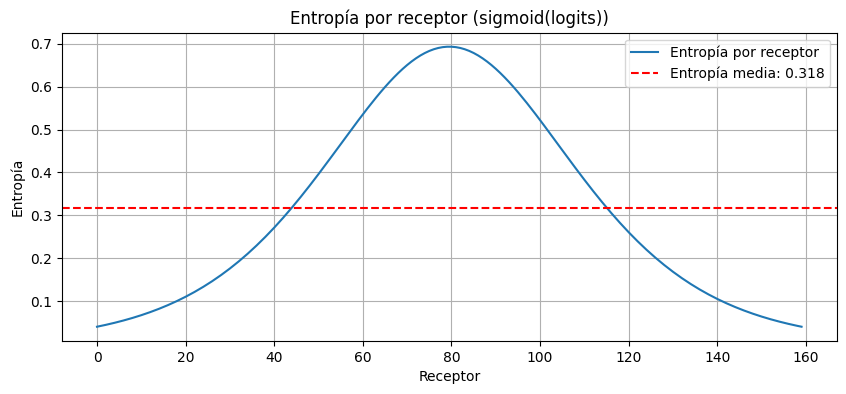

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

logits = torch.linspace(-5, 5, 160)
probs = torch.sigmoid(logits)

eps = 1e-10  # para evitar log(0)
entropy = -probs * torch.log(probs + eps) - (1 - probs) * torch.log(1 - probs + eps)

plt.figure(figsize=(10, 4))
plt.plot(entropy.detach().numpy(), label="Entropía por receptor")
plt.axhline(entropy.mean().item(), color='red', linestyle='--', label=f"Entropía media: {entropy.mean().item():.3f}")
plt.title("Entropía por receptor (sigmoid(logits))")
plt.xlabel("Receptor")
plt.ylabel("Entropía")
plt.legend()
plt.grid(True)
plt.show()


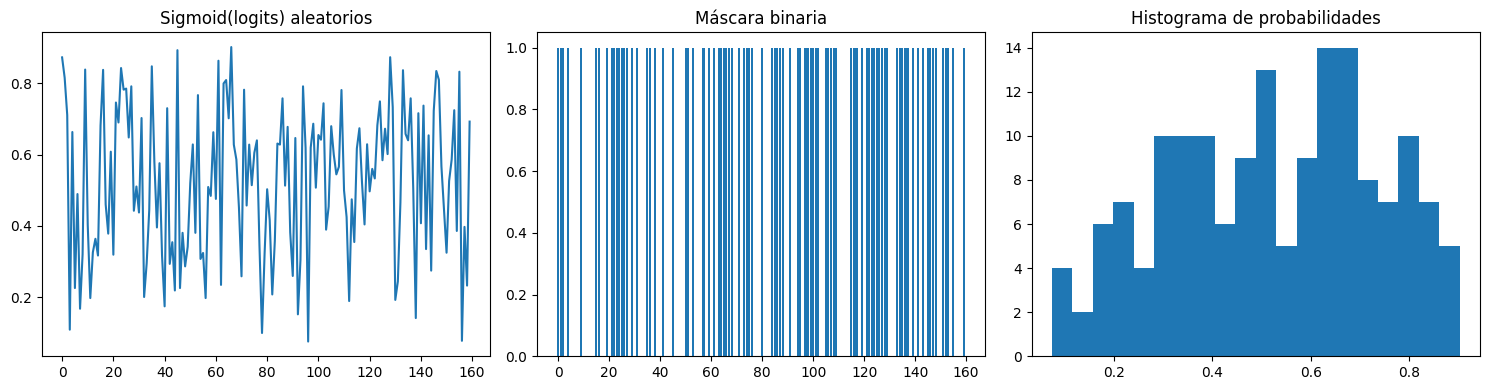

Activos: 89.0/160 → 55.62% activos
Entropía media: 0.598


In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

torch.manual_seed(42)  # reproducibilidad
logits = torch.randn(160)
probs = torch.sigmoid(logits)
mask = (probs > 0.5).float()

eps = 1e-10
entropy = -probs * torch.log(probs + eps) - (1 - probs) * torch.log(1 - probs + eps)
entropy_mean = entropy.mean().item()

fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].plot(probs.detach().numpy())
axs[0].set_title("Sigmoid(logits) aleatorios")

axs[1].bar(np.arange(160), mask.detach().numpy())
axs[1].set_title("Máscara binaria")

axs[2].hist(probs.detach().numpy(), bins=20)
axs[2].set_title("Histograma de probabilidades")

plt.tight_layout()
plt.show()

print(f"Activos: {mask.sum().item()}/{len(mask)} → {mask.mean().item()*100:.2f}% activos")
print(f"Entropía media: {entropy_mean:.3f}")


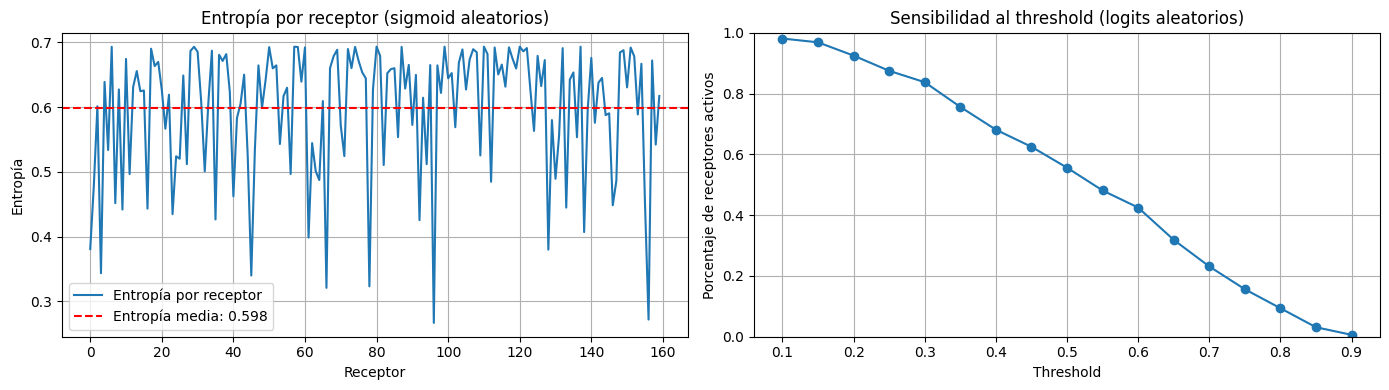

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

torch.manual_seed(42)
logits = torch.randn(160)
probs = torch.sigmoid(logits)

eps = 1e-10
entropy = -probs * torch.log(probs + eps) - (1 - probs) * torch.log(1 - probs + eps)
entropy_mean = entropy.mean().item()

thresholds = np.linspace(0.1, 0.9, 17)
densities = [(probs > t).float().mean().item() for t in thresholds]

fig, axs = plt.subplots(1, 2, figsize=(14, 4))

axs[0].plot(entropy.detach().numpy(), label="Entropía por receptor")
axs[0].axhline(entropy_mean, color='red', linestyle='--', label=f"Entropía media: {entropy_mean:.3f}")
axs[0].set_title("Entropía por receptor (sigmoid aleatorios)")
axs[0].set_xlabel("Receptor")
axs[0].set_ylabel("Entropía")
axs[0].legend()
axs[0].grid(True)

axs[1].plot(thresholds, densities, marker='o')
axs[1].set_title("Sensibilidad al threshold (logits aleatorios)")
axs[1].set_xlabel("Threshold")
axs[1].set_ylabel("Porcentaje de receptores activos")
axs[1].grid(True)
axs[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()
